In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [10]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Predict on the first test image
predictions = model.predict(x_test)
print(f'Predicted label: {np.argmax(predictions[0])}')
print(f'True label: {y_test[0]}')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8783 - loss: 0.4338 - val_accuracy: 0.9540 - val_loss: 0.1519
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9630 - loss: 0.1233 - val_accuracy: 0.9697 - val_loss: 0.1001
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9756 - loss: 0.0816 - val_accuracy: 0.9714 - val_loss: 0.0942
313/313 - 0s - 668us/step - accuracy: 0.9714 - loss: 0.0942

Test accuracy: 0.9714000225067139
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
Predicted label: 7
True label: 7


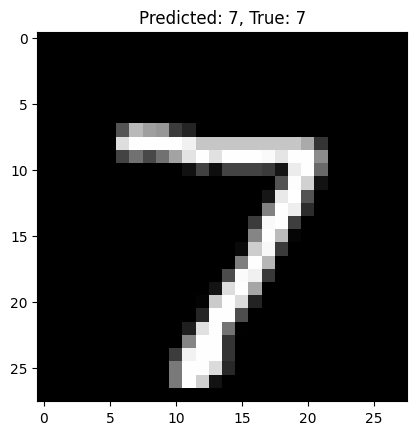

In [19]:
# Visualize the first test image and its prediction
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}, True: {y_test[0]}")
plt.show()